<a href="https://colab.research.google.com/github/yougaoshiqing/Aipan/blob/main/Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/huhuhang/Mask_RCNN.git"

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 37 (delta 4), reused 30 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 79.00 KiB | 2.82 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
!pip install -r "/content/Mask_RCNN/requirements.txt"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 49.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.25.2
    Uninstalling scikit-image-0.25.2:
      Successfully uninstalled scikit-image-0.25.2


In [ ]:
!cp /usr/local/lib/python3.11/dist-packages/imgaug/imgaug.py /content/Mask_RCNN/updatefile/

In [3]:
!cp /content/Mask_RCNN/updatefile/imgaug.py  /usr/local/lib/python3.11/dist-packages/imgaug/

In [4]:
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append("/content/Mask_RCNN")  # 链接到自定义 mrcnn 库
sys.path.append("/content/Mask_RCNN/samples/coco/")  # 链接到自定义 COCO 模块

In [5]:
import os
from mrcnn import utils

# 下载 Mask R-CNN 在 COCO 数据集上的预训练模型
utils.download_trained_weights("mask_rcnn_coco.h5")

正在从镜像服务器下载预训练模型, 请耐心等待.
模型存放至 mask_rcnn_coco.h5 ...
模型下载完成.


In [6]:
import coco
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()
inference_config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [9]:

import importlib
import mrcnn.model as modellib
importlib.reload(modellib)
Model_dir = os.path.abspath("/content/Mask_RCNN/logs")
model = modellib.MaskRCNN(mode="inference",
                          config=inference_config, model_dir=Model_dir)
model.load_weights("/content/mask_rcnn_coco.h5", by_name=True)
model



In [ ]:
dataset = coco.CocoDataset()
dataset.load_coco(COCO_DIR, "train")
dataset.perpare()
print(dataset.classnames)


NameError: name 'COCO_DIR' is not defined

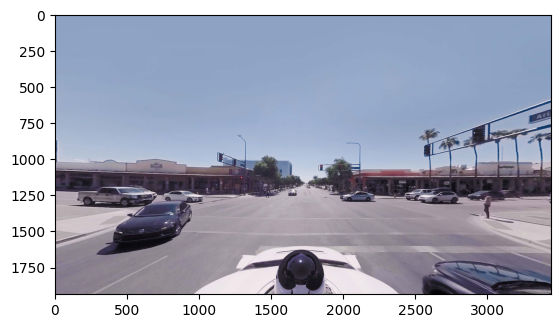

In [10]:
import requests
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline

url = "https://cdn.aibydoing.com/aibydoing/images/document-uid214893labid7506timestamp1551679627073.jpg"

with open("test.jpg", "wb") as f:
  f.write(requests.get(url).content)
plt.imshow(io.imread("test.jpg"))


In [11]:
# COCO 类别名称，顺序相关
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Processing 1 images
image                    shape: (1936, 3440, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 3440.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


Instructions for updating:
Use fn_output_signature instead


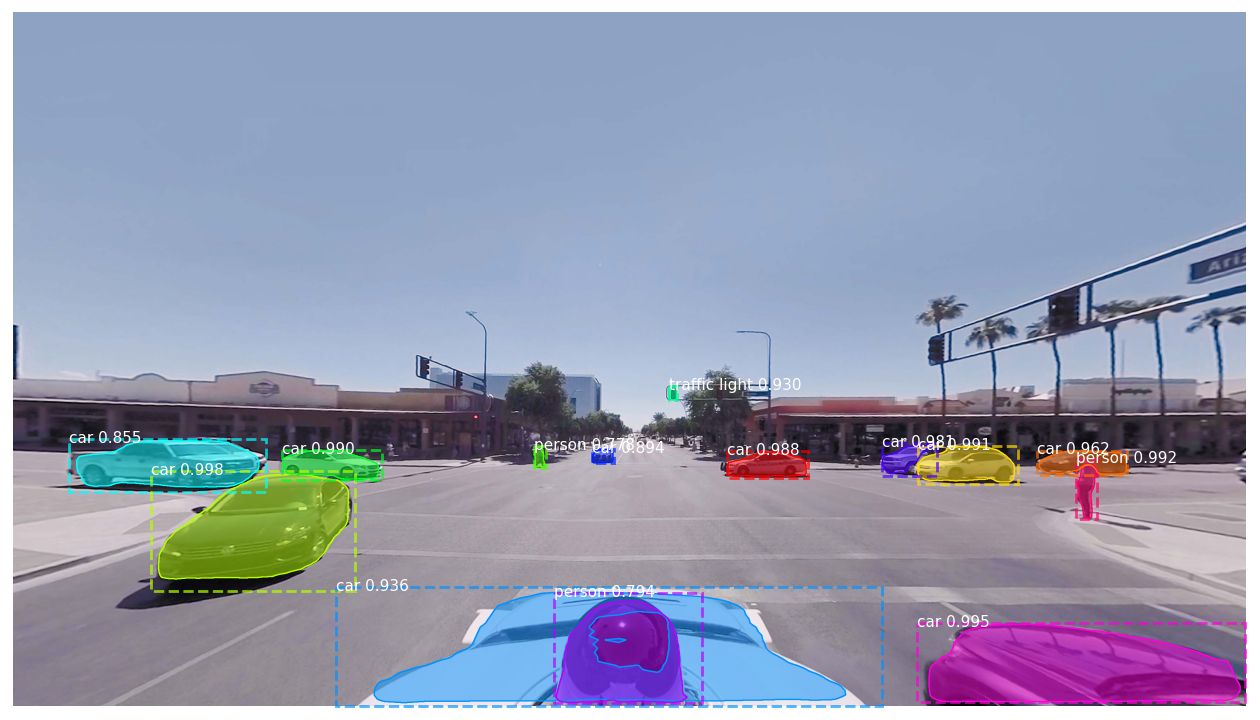

In [15]:
from mrcnn import visualize
importlib.reload(modellib)

image = io.imread("test.jpg")
results = model.detect([image], verbose=1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                           class_names, r['scores'])

In [ ]:
import tensorflow as tf
s = tf.shape([[1,1,1],[2,2,2]])
print(s[0])

tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
import tensorflow_transform

ModuleNotFoundError: No module named 'tensorflow_transform'

In [ ]:
#import imgaug
import numpy
#print(imgaug.__version__)
print(numpy.__version__)


2.0.2


In [ ]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

2.18.0
3.8.0


In [ ]:
tf.log(1)

AttributeError: module 'tensorflow' has no attribute 'log'